In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv("allUsers.lcl.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
Class    78096 non-null int64
User     78096 non-null int64
X0       78096 non-null float64
Y0       78096 non-null float64
Z0       78096 non-null float64
X1       78096 non-null float64
Y1       78096 non-null float64
Z1       78096 non-null float64
X2       78096 non-null float64
Y2       78096 non-null float64
Z2       78096 non-null float64
X3       78096 non-null object
Y3       78096 non-null object
Z3       78096 non-null object
X4       78096 non-null object
Y4       78096 non-null object
Z4       78096 non-null object
X5       78096 non-null object
Y5       78096 non-null object
Z5       78096 non-null object
X6       78096 non-null object
Y6       78096 non-null object
Z6       78096 non-null object
X7       78096 non-null object
Y7       78096 non-null object
Z7       78096 non-null object
X8       78096 non-null object
Y8       78096 non-null object
Z8       78096 n

In [36]:
df.head()

,Class,User,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,1,0,54.263880,71.466776,-64.807709,76.895635,42.462500,-72.780545,36.621229,81.680557,...,?,?,?,?,?,?,?,?,?,?
2,1,0,56.527558,72.266609,-61.935252,39.135978,82.538530,-49.596509,79.223743,43.254091,...,?,?,?,?,?,?,?,?,?,?
3,1,0,55.849928,72.469064,-62.562788,37.988804,82.631347,-50.606259,78.451526,43.567403,...,?,?,?,?,?,?,?,?,?,?
4,1,0,55.329647,71.707275,-63.688956,36.561863,81.868749,-52.752784,86.320630,68.214645,...,?,?,?,?,?,?,?,?,?,?


In [37]:
%matplotlib inline
df.iloc[:,2:].apply(lambda col: col.str.contains('?', regex=False).sum(), axis=0)

X0         0.0
Y0         0.0
Z0         0.0
X1         0.0
Y1         0.0
Z1         0.0
X2         0.0
Y2         0.0
Z2         0.0
X3       690.0
Y3       690.0
Z3       690.0
X4      3120.0
Y4      3120.0
Z4      3120.0
X5     13023.0
Y5     13023.0
Z5     13023.0
X6     25848.0
Y6     25848.0
Z6     25848.0
X7     39152.0
Y7     39152.0
Z7     39152.0
X8     47532.0
Y8     47532.0
Z8     47532.0
X9     54128.0
Y9     54128.0
Z9     54128.0
X10    63343.0
Y10    63343.0
Z10    63343.0
X11    78064.0
Y11    78064.0
Z11    78064.0
dtype: float64

In [38]:
#sensor 1 through 4 are on the back of the hand and should be visible for all gestures
#we identify which users occluded these origin sensors for each gesture in the table below

#We need to drop user 13 from gesture 3, and User 14 from gesture 5
#For remaining users, use mean sensor position for each gesture to fill missing values

#the goal is to have valid sensor values for all 4 origin sensors S0=(X0,Y0,Z0) to S3=(X3,Y3,Z3)

display((df[['Class', 'User', 'X3']]
 .groupby(['Class', 'User'], as_index=False)
 .agg(lambda grp: grp.str.contains('?', regex=False).sum() / grp.size * 100)
 .query('X3 > 0') #don't display 0s
 .pivot(index='Class',columns='User',values='X3')))

display((df[['Class', 'User', 'X3']]
 .groupby(['Class', 'User'], as_index=False)
 .agg(lambda grp: grp.size * 100)
 .pivot(index='Class',columns='User',values='X3')))

User,0,1,4,7,10,13,14
Class,,,,,,,
1,12.660256,0.6886,24.137931,4.761905,0.041719,0.142383,24.286582
3,NaN,NaN,7.633588,1.492537,NaN,0.598086,NaN
4,NaN,NaN,0.675676,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,0.542005


User,0,1,2,4,5,6,7,8,9,10,11,12,13,14
Class,,,,,,,,,,,,,,
0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,187200.0,130700.0,119800.0,2900.0,82000.0,73800.0,8400.0,109700.0,65300.0,239700.0,160400.0,71200.0,210700.0,164700.0
2,150100.0,79600.0,80800.0,7100.0,114300.0,96200.0,12400.0,139200.0,91800.0,148100.0,138000.0,94100.0,167100.0,179000.0
3,185100.0,96800.0,72100.0,13100.0,92600.0,77900.0,13400.0,167000.0,67600.0,210800.0,160100.0,108700.0,167200.0,202000.0
4,178100.0,56100.0,67700.0,14800.0,103300.0,74400.0,15000.0,116000.0,83200.0,189400.0,188100.0,121200.0,177100.0,93100.0
5,204300.0,108500.0,110900.0,NaN,118300.0,115400.0,NaN,149200.0,84100.0,169300.0,159500.0,91300.0,151800.0,110700.0


In [39]:
#Drop all gestures for a given user if sensors occluded too many times
#replace '?' with NaN
dropped_indices = df.query('Class==0').index
df = (df
      .drop(labels=dropped_indices, axis=0, errors='ignore')
      .replace(to_replace='?', value=np.nan))

#set data types
df = pd.concat([df.iloc[:,:2].astype(str), df.iloc[:,2:].astype(np.float64)], axis=1)

In [51]:
#impute Nans and shift all origin sensors to global average for each gesture
def origin_shift(coordinate, gesture):
    if 'X' in coordinate.name:
        offset = mainsensor_x_mean[gesture]
    elif 'Y' in coordinate.name:
        offset = mainsensor_y_mean[gesture]
    else:
        offset = mainsensor_z_mean[gesture]
    return coordinate.fillna(coordinate.mean()) - offset

def sensor_mean(df, classes):
    result = (df
            .apply(np.mean, axis=1, result_type='reduce')
            .groupby(classes)
            .agg(np.mean))
    return result

mainsensor_x_mean = sensor_mean(df[['X0', 'X1', 'X2', 'X3']], df['Class'])
mainsensor_y_mean = sensor_mean(df[['Y0', 'Y1', 'Y2', 'Y3']], df['Class'])
mainsensor_z_mean = sensor_mean(df[['Z0', 'Z1', 'Z2', 'Y3']], df['Class'])

df_origin = pd.DataFrame()

for name, group in df.groupby(['Class', 'User']):
    df_origin = df_origin.append(
                    pd.concat(
                        [group.iloc[:,:2], 
                         group.iloc[:,2:].apply(lambda coordinate: origin_shift(coordinate, gesture=name[0]))], 
                    axis=1))

df_origin = df_origin.sort_index()

In [57]:
df_origin.describe()

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
count,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,...,43459.000000,35084.000000,35084.000000,35084.000000,27888.000000,27888.000000,27888.000000,2667.000000,2667.000000,2667.000000
mean,1.105672,1.387995,-27.697616,0.355208,1.768596,-27.222099,-0.627893,-0.652767,-28.273426,-0.866898,...,-30.336965,8.006346,-17.927257,-40.600016,8.547291,-20.911829,-41.109357,-43.314534,-69.979790,-31.780995
std,31.958123,38.779075,31.223038,31.562079,38.151122,31.015525,32.592733,37.891991,31.028498,32.743310,...,34.748433,36.527995,42.493640,35.424183,32.439448,38.324992,33.449928,47.121125,9.958072,18.312058
min,-160.048134,-171.841517,-140.971792,-163.180637,-186.427644,-141.992356,-166.852130,-191.074366,-130.415628,-163.256449,...,-166.921913,-150.727084,-169.417896,-135.656410,-131.691685,-169.702907,-127.985486,-148.447086,-170.115755,-72.542092
25%,-18.829191,-23.792420,-46.308354,-20.815756,-19.786219,-46.316178,-23.767487,-22.775992,-47.659404,-23.897081,...,-49.895106,-11.335206,-53.142787,-65.429792,-9.911221,-54.517440,-62.091219,-99.413586,-82.359776,-56.909280
50%,4.807886,6.439998,-25.503009,4.036547,6.792953,-25.674349,2.914908,5.212506,-27.650606,2.657171,...,-27.454464,13.269520,-12.192594,-38.090244,11.770504,-16.440524,-36.935711,-42.147469,-64.360324,-20.130143
75%,22.333771,30.319935,-7.770187,22.030126,28.942728,-6.669938,22.175548,24.753778,-7.364863,21.881524,...,-1.347190,34.128930,14.412849,-16.715502,30.024743,11.142732,-19.395684,13.162830,-61.946500,-17.271031
max,148.246813,88.721338,102.789092,146.920974,89.174656,114.915024,146.989145,88.969532,116.171357,103.326222,...,94.945686,122.559007,88.583363,99.113097,97.990828,86.709291,84.188133,33.187932,23.261878,-6.205129


In [58]:
df.describe()

,X0,Y0,Z0,X1,Y1,Z1,X2,Y2,Z2,X3,...,Z8,X9,Y9,Z9,X10,Y10,Z10,X11,Y11,Z11
count,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,78095.000000,77405.000000,...,30563.000000,23967.000000,23967.000000,23967.000000,14752.000000,14752.000000,14752.000000,31.000000,31.000000,31.000000
mean,50.346308,85.813150,-29.985096,49.595844,86.193751,-29.509579,48.612744,83.772387,-30.560906,48.492574,...,-24.364841,54.749001,80.545795,-27.778042,53.758675,74.003619,-29.737987,-29.697613,25.963332,1.697312
std,32.695886,40.203448,34.361971,32.477961,40.452297,34.764460,33.605155,41.022710,35.120384,33.873116,...,35.736660,39.969941,42.673837,36.251050,38.459845,42.912355,39.678406,50.294272,36.848373,19.978189
min,-108.552738,-98.233756,-126.770872,-111.685241,-96.142589,-166.006838,-106.886524,-100.789312,-129.595296,-111.761053,...,-142.654497,-99.231688,-64.734284,-113.397327,-80.196289,-65.019295,-112.668930,-96.951690,-65.432143,-48.274677
25%,29.295141,63.497746,-56.356593,28.755679,64.156450,-57.360408,25.173405,58.053733,-58.654339,23.861711,...,-52.521710,26.114788,44.037189,-55.620085,20.419652,37.698369,-62.964758,-62.753457,24.499996,-4.517642
50%,54.620245,86.526334,-30.864248,54.215714,87.543493,-30.185331,53.814592,86.459935,-32.356535,54.136687,...,-22.458018,61.996840,84.738873,-26.800564,61.844638,78.995937,-32.913794,-48.593433,38.938100,11.305118
75%,72.488833,113.108673,-1.419462,71.763080,116.228881,-0.368080,71.561988,106.661720,-0.946134,71.435593,...,6.418888,83.766679,115.556768,3.066336,83.055701,100.949772,6.065748,-2.195358,40.808989,12.821593
max,190.017835,169.175464,113.345119,188.691997,170.209350,104.697852,188.760168,168.186466,104.590879,151.033472,...,119.213101,174.054403,167.942588,123.380512,149.486224,168.352478,108.455548,84.683328,127.945490,18.062286


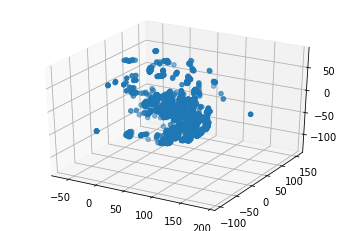

In [50]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
space = plt.figure().gca(projection='3d') 
space.scatter(df.query('Class==\'1\'')['X0'], 
              df.query('Class==\'1\'')['Y0'], 
              df.query('Class==\'1\'')['Z0'])

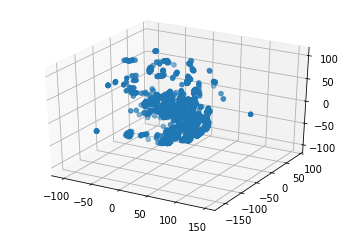

In [52]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
space = plt.figure().gca(projection='3d') 
space.scatter(df_origin.query('Class==\'1\'')['X0'], 
              df_origin.query('Class==\'1\'')['Y0'], 
              df_origin.query('Class==\'1\'')['Z0'])

### Heber's note: From this point we may want to convert dates to just year, or to quarters of year.
### We may want to drop other variables.
### We should fill missing data.
### I will work on some summary plots.


In [85]:
df.dtypes

Class      int64
User       int64
X0       float64
Y0       float64
Z0       float64
X1       float64
Y1       float64
Z1       float64
X2       float64
Y2       float64
Z2       float64
X3        object
Y3        object
Z3        object
X4        object
Y4        object
Z4        object
X5        object
Y5        object
Z5        object
X6        object
Y6        object
Z6        object
X7        object
Y7        object
Z7        object
X8        object
Y8        object
Z8        object
X9        object
Y9        object
Z9        object
X10       object
Y10       object
Z10       object
X11       object
Y11       object
Z11       object
dtype: object

In [1]:
import ipyvolume as ipv
import vaex

In [1]:
import numpy as np
import ipyvolume as ipv
V = np.zeros((128,128,128)) # our 3d array
# outer box
V[30:-30,30:-30,30:-30] = 0.75
V[35:-35,35:-35,35:-35] = 0.0
# inner box
V[50:-50,50:-50,50:-50] = 0.25
V[55:-55,55:-55,55:-55] = 0.0
ipv.quickvolshow(V, level=[0.25, 0.75], opacity=0.03, level_width=0.1, data_min=0, data_max=1)

/home/jat055000_gmail_com/anaconda3/envs/py37/lib/python3.6/site-packages/ipyvolume/serialize.py:81: RuntimeWarning: invalid value encountered in true_divide
  gradient = gradient / np.sqrt(gradient[0]**2 + gradient[1]**2 + gradient[2]**2)


In [2]:
ds = vaex.example()
N = 10000

ipv.figure()
quiver = ipv.quiver(ds.data.x[:N],  ds.data.y[:N],  ds.data.z[:N],
                    ds.data.vx[:N], ds.data.vy[:N], ds.data.vz[:N],
                    size=1, size_selected=5, color_selected="grey")
ipv.xyzlim(-30, 30)
ipv.show()

In [ ]:
import ipyvolume as ipv
import numpy as np
x, y, z = np.random.random((3, 10000))
scatter = ipv.quickscatter(x, y, z, size=1, marker="sphere")
ipv.show()

In [2]:
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to static HTML file
output_file("lines.html")

# create a new plot with a title and axis labels
p = figure(title="simple line example", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Temp.", line_width=2)

GlyphRenderer(id='1038', ...)

In [3]:
output_notebook()

Loading BokehJS ...

In [4]:
show(p)